# Count Vectorizer with Multinomial Naive Bayes analysis 

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
shoes = pd.read_csv('datasets/shoes_data.csv')

In [3]:
shoes.head()

title_token  \
0  ['ordered', 'a', 'pair', 'of', 'these', 'my', ...   
1  ['started', 'grey', 'day', 'getting', 'a', 'li...   
2  ['started', 'grey', 'day', 'getting', 'a', 'li...   
3  ['started', 'on', 'grey', 'day', 'getting', 'a...   
4  ['when', 'will', 'these', 'drop', 'on', 'the',...   

                                 title_tokens_merged   subreddit  
0  ordered a pair of these my first 327 s im in love  Newbalance  
1              started grey day getting a lil hooked  Newbalance  
2              started grey day getting a lil hooked  Newbalance  
3           started on grey day getting a lil hooked  Newbalance  
4  when will these drop on the nb website i have ...  Newbalance

In [4]:
shoes.isnull().sum()

title_token            0
title_tokens_merged    0
subreddit              0
dtype: int64

In [5]:
shoes = shoes.dropna()

### Define X and y

In [6]:
X = shoes['title_tokens_merged']
y = shoes['subreddit']

## Baseline accuracy score (score to beat)

In [7]:
y.value_counts(normalize=True)

Newbalance    0.500251
Nike          0.499749
Name: subreddit, dtype: float64

### Split the data into train and test data 

In [8]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [9]:
X_test

774     beat the everliving shit out of these tending ...
969                                  wide footer question
345     m990ry v4 cameo because my dad came by with so...
276                                     f you new balance
742                  couple dope 574 i picked up recently
                              ...                        
1497    hey guys i ve got a pair of nike dunk high rai...
474                            can anyone id these for me
1953    would you guys file a warranty return on this ...
1794    how do you guys feel on the purple pulses i pi...
811     thoughts on the 57 40 personally i feel like t...
Name: title_tokens_merged, Length: 658, dtype: object

### Instantiate the Count Vectorizer 

In [10]:
# Instantiate a CountVectorizer.
cv = CountVectorizer(stop_words='english')

### Fit the train data onto the Count Vectorizer (transformer)

In [11]:
cv.fit(X_train)

CountVectorizer(stop_words='english')

In [12]:
len(cv.get_feature_names()) # number of unique words

2182

In [13]:
cv.get_feature_names()[1010:1025]

['inner',
 'innovate',
 'inquiry',
 'insane',
 'inside',
 'insole',
 'insoles',
 'inspired',
 'insta',
 'instagram',
 'instructions',
 'intelligent',
 'interested',
 'interesting',
 'international']

In [14]:
cv.vocabulary_

{'consolation': 526,
 'price': 1504,
 'came': 405,
 'mail': 1219,
 'today': 1953,
 'know': 1089,
 'fix': 793,
 'yellowing': 2167,
 '993s': 173,
 'lpu': 1181,
 '992ca': 168,
 'lc': 1113,
 'nike': 1348,
 'react': 1558,
 '87': 129,
 'stockx': 1835,
 'nb': 1325,
 '574': 103,
 'size': 1750,
 'm992lt': 1210,
 'better': 329,
 'person': 1438,
 'expected': 729,
 'rolling': 1645,
 'head': 929,
 'turners': 2000,
 'release': 1590,
 'year': 2164,
 'wear': 2103,
 'care': 415,
 '10': 5,
 'years': 2165,
 'hello': 938,
 'help': 939,
 'identity': 991,
 'trousers': 1992,
 'pls': 1464,
 'gonna': 868,
 'try': 1994,
 'levi': 1133,
 'collabs': 483,
 'tmr': 1952,
 'tips': 1951,
 'queue': 1540,
 'quick': 1541,
 'tech': 1903,
 'fleece': 798,
 'look': 1164,
 'real': 1562,
 'v2': 2044,
 'recently': 1571,
 '1980s': 33,
 'baby': 295,
 'sneakers': 1773,
 'garage': 841,
 'sale': 1664,
 'need': 1333,
 'identifying': 990,
 'style': 1856,
 'possible': 1483,
 'value': 2056,
 'thank': 1919,
 'information': 1007,
 'rocking

### Start analysis by transforming the corpus with the Count Vectorizer 

In [15]:
# Transform the corpus.
X_train = cv.transform(X_train)

In [16]:
X_test = cv.transform(X_test)

### Create dataframe of the vocabulary present in the dataset

In [17]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cv.get_feature_names())

In [18]:
X_train_df.head()

00  001  0011  00am  07  10  100  1080  1080v11  10x  ...  yooou  young  \
0   0    0     0     0   0   0    0     0        0    0  ...      0      0   
1   0    0     0     0   0   0    0     0        0    0  ...      0      0   
2   0    0     0     0   0   0    0     0        0    0  ...      0      0   
3   0    0     0     0   0   0    0     0        0    0  ...      0      0   
4   0    0     0     0   0   0    0     0        0    0  ...      0      0   

   youtu  youtube  youtuber  zag  zig  zip  zone  zoom  
0      0        0         0    0    0    0     0     0  
1      0        0         0    0    0    0     0     0  
2      0        0         0    0    0    0     0     0  
3      0        0         0    0    0    0     0     0  
4      0        0         0    0    0    0     0     0  

[5 rows x 2182 columns]

### Get the top 15 words present in the dataset

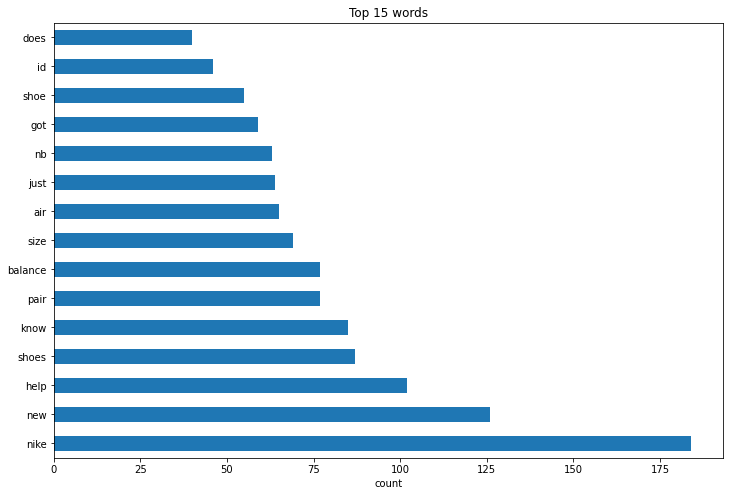

In [19]:
plt.figure(figsize=(12,8))
plt.xlabel('count')
plt.title('Top 15 words')
X_train_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

plt.savefig('visuals/top_15_words.jpeg')

### Redefine the training and testing sets for pipe analysis 

##### Data was already transformed on the Count Vectorizer so we need to redefine 

In [20]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [21]:
X_train

305            a consolation price came in the mail today
692      anyone know how to fix this yellowing on my 993s
694                                             lpu 992ca
1625                      lc on nike react 87 from stockx
953                                         nb 574 x size
                              ...                        
528      575sp today this shoe deserves to be in a museum
1508    what color model is this and what do you think...
1135              qc aj1 made me more confident in school
1294    can you help me identify the hoodie may be fak...
666     ml2002rr rain cloud on sale for 87 other nbs o...
Name: title_tokens_merged, Length: 1335, dtype: object

### Pipeline analysis of shoes dataset with Count Vectorizer and Multinomial Naive Bayes 

In [22]:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cv', CountVectorizer()), 
    ('mnb', MultinomialNB()),
    
])

In [23]:
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9325842696629213, 0.8419452887537994)

### Check out some predictions 

In [24]:
pipe.predict(['nike'])

array(['Nike'], dtype='<U10')

In [25]:
pipe.predict(['nike', 'new balance', '997', 'jordan'])

array(['Nike', 'Newbalance', 'Newbalance', 'Nike'], dtype='<U10')

### Gridsearch analysis with different hyperparameters for the Count Vectorizer 

In [26]:
pipe_params = {
    'cv__stop_words':[None, 'english'],
    'cv__max_features':[None, 5000],
    'cv__ngram_range':[(1,1),(1,2)]
}

In [27]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params, 
                  cv=5)

In [28]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cv__max_features': [None, 5000],
                         'cv__ngram_range': [(1, 1), (1, 2)],
                         'cv__stop_words': [None, 'english']})

In [29]:
gs.best_score_

0.8441947565543071

In [30]:
gs.best_params_

{'cv__max_features': None,
 'cv__ngram_range': (1, 1),
 'cv__stop_words': 'english'}

In [31]:
gs.score(X_test, y_test)

0.8358662613981763

In [32]:
gs.best_estimator_.named_steps['cv']

CountVectorizer(stop_words='english')

In [33]:
X_test

774     beat the everliving shit out of these tending ...
969                                  wide footer question
345     m990ry v4 cameo because my dad came by with so...
276                                     f you new balance
742                  couple dope 574 i picked up recently
                              ...                        
1497    hey guys i ve got a pair of nike dunk high rai...
474                            can anyone id these for me
1953    would you guys file a warranty return on this ...
1794    how do you guys feel on the purple pulses i pi...
811     thoughts on the 57 40 personally i feel like t...
Name: title_tokens_merged, Length: 658, dtype: object

### Create dataframe of the predictions 

In [34]:
test_preds = gs.predict(X_test)

In [35]:
pred_df = pd.DataFrame({'test': X_test.values, 'true label':y_test.values, 'predicted label':test_preds})

In [36]:
pred_df

test  true label  \
0    beat the everliving shit out of these tending ...  Newbalance   
1                                 wide footer question  Newbalance   
2    m990ry v4 cameo because my dad came by with so...  Newbalance   
3                                    f you new balance  Newbalance   
4                 couple dope 574 i picked up recently  Newbalance   
..                                                 ...         ...   
653  hey guys i ve got a pair of nike dunk high rai...        Nike   
654                         can anyone id these for me  Newbalance   
655  would you guys file a warranty return on this ...        Nike   
656  how do you guys feel on the purple pulses i pi...        Nike   
657  thoughts on the 57 40 personally i feel like t...  Newbalance   

    predicted label  
0        Newbalance  
1        Newbalance  
2        Newbalance  
3        Newbalance  
4        Newbalance  
..              ...  
653            Nike  
654            Nike  
655            Nike  
656            Nike  
657      Newbalance  

[658 rows x 3 columns]

### Create dataframe with only the incorrectly predicted values

In [37]:
pred_df[pred_df['true label'] != pred_df['predicted label']].head(15)

test  true label  \
7                 does anyone know what model this is  Newbalance   
9                                 which model is this        Nike   
16  spilt coffee on the white toe box how do i cle...  Newbalance   
21                                       is this okay        Nike   
28  did a lil over laces swap for the off white du...        Nike   
33                                          need help  Newbalance   
38    yep there are some of them that are in the wild        Nike   
42  daily poster challenge that i and my friend di...  Newbalance   
43  so did anyone actually cop these pair of sexy ...        Nike   
51  my father s day gift tn 1 triple black and a t...        Nike   
58  swapped out the stock black laces for the ted ...        Nike   
61               pls help anyone identifies this shoe  Newbalance   
70                      i need to clean up these 850s  Newbalance   
75             another nice ebay find 100 winning bid  Newbalance   
79  anyone able to id these i wanna get ahold of a...  Newbalance   

   predicted label  
7             Nike  
9       Newbalance  
16            Nike  
21      Newbalance  
28      Newbalance  
33            Nike  
38      Newbalance  
42            Nike  
43      Newbalance  
51      Newbalance  
58      Newbalance  
61            Nike  
70            Nike  
75            Nike  
79            Nike

### Plot the misclassifications with a confusion matrix 

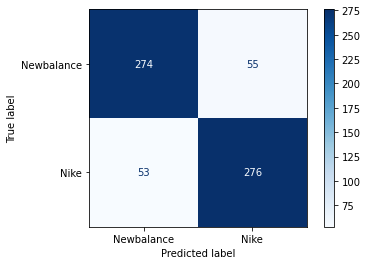

In [38]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');
plt.savefig('visuals/confusion_matrix_cv_mnb.jpeg')

### Get the report of the predictions including precision, accuracy, etc. 

In [39]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

  Newbalance       0.84      0.83      0.84       329
        Nike       0.83      0.84      0.84       329

    accuracy                           0.84       658
   macro avg       0.84      0.84      0.84       658
weighted avg       0.84      0.84      0.84       658

